## Micro-Climate Prediction

This project is a simple time series forecast of various weather forecasts such as "Temperature", "Humidity" and "Pressure".

The date in the dataset ranges from 2019-01-01 to 2019-12-31.

The model used for this problem statement is Facebook's time series model library known as "Prophet".

In [1]:
#Importing the libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
#Storing the dataset in the csv format in the form of dataframe.

df = pd.read_csv("C:/Users/aniru/OneDrive/Desktop/Machine Learning Projects/Micro-Climate Forecast/plot2-Source 1 Weather.csv")
df

,sensor,value,datetime
0,TC,16.5,2019-01-01 00:00:00+00:00
1,HUM,44.0,2019-01-01 00:00:00+00:00
2,PRES,1020.0,2019-01-01 00:00:00+00:00
3,TC,17.3,2019-01-01 01:00:00+00:00
4,HUM,43.0,2019-01-01 01:00:00+00:00
...,...,...,...
26206,HUM,47.0,2019-12-31 22:30:00+00:00
26207,PRES,1016.0,2019-12-31 22:30:00+00:00
26208,TC,17.0,2019-12-31 23:30:00+00:00
26209,HUM,46.0,2019-12-31 23:30:00+00:00


Data Pre-Processing for to obtain prediction for temperature values.

In [3]:
Temperature = ['TC']

In [4]:
#Filtering all the records containing temperature sensor and storing them seperately.

Temp_Sensor = df[df['sensor'].isin(Temperature)]
Temp_Sensor = Temp_Sensor.drop(['sensor'],axis=1)
Temp_Sensor

,value,datetime
0,16.5,2019-01-01 00:00:00+00:00
3,17.3,2019-01-01 01:00:00+00:00
6,18.0,2019-01-01 02:00:00+00:00
9,18.8,2019-01-01 03:00:00+00:00
12,20.5,2019-01-01 04:00:00+00:00
...,...,...
26196,16.0,2019-12-31 19:30:00+00:00
26199,18.0,2019-12-31 20:30:00+00:00
26202,18.0,2019-12-31 21:30:00+00:00
26205,18.0,2019-12-31 22:30:00+00:00


In [5]:
#Checking the datatype of the column values in the dataset.

Temp_Sensor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8737 entries, 0 to 26208
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   value     8737 non-null   float64
 1   datetime  8737 non-null   object 
dtypes: float64(1), object(1)
memory usage: 204.8+ KB


In [6]:
X_Temp = Temp_Sensor['value']
X_Time = Temp_Sensor['datetime']

In [7]:
#Exchanging the column positions.

X_Temp = pd.concat([X_Time,X_Temp],axis=1,ignore_index=True)
X_Temp

,0,1
0,2019-01-01 00:00:00+00:00,16.5
3,2019-01-01 01:00:00+00:00,17.3
6,2019-01-01 02:00:00+00:00,18.0
9,2019-01-01 03:00:00+00:00,18.8
12,2019-01-01 04:00:00+00:00,20.5
...,...,...
26196,2019-12-31 19:30:00+00:00,16.0
26199,2019-12-31 20:30:00+00:00,18.0
26202,2019-12-31 21:30:00+00:00,18.0
26205,2019-12-31 22:30:00+00:00,18.0


In [8]:
#Renaming the columns. The datetime column is given the name ds and the values as y, Since that is the naming nomenclature
#used by the prophet library in order to make predictions.

X_Temp['ds'] = X_Temp[0]
X_Temp['y'] = X_Temp[1]
X_Temp

,0,1,ds,y
0,2019-01-01 00:00:00+00:00,16.5,2019-01-01 00:00:00+00:00,16.5
3,2019-01-01 01:00:00+00:00,17.3,2019-01-01 01:00:00+00:00,17.3
6,2019-01-01 02:00:00+00:00,18.0,2019-01-01 02:00:00+00:00,18.0
9,2019-01-01 03:00:00+00:00,18.8,2019-01-01 03:00:00+00:00,18.8
12,2019-01-01 04:00:00+00:00,20.5,2019-01-01 04:00:00+00:00,20.5
...,...,...,...,...
26196,2019-12-31 19:30:00+00:00,16.0,2019-12-31 19:30:00+00:00,16.0
26199,2019-12-31 20:30:00+00:00,18.0,2019-12-31 20:30:00+00:00,18.0
26202,2019-12-31 21:30:00+00:00,18.0,2019-12-31 21:30:00+00:00,18.0
26205,2019-12-31 22:30:00+00:00,18.0,2019-12-31 22:30:00+00:00,18.0


In [9]:
#Dropping the redundant datetime column.

X_Temp = X_Temp.drop([0],axis=1)
X_Temp

,1,ds,y
0,16.5,2019-01-01 00:00:00+00:00,16.5
3,17.3,2019-01-01 01:00:00+00:00,17.3
6,18.0,2019-01-01 02:00:00+00:00,18.0
9,18.8,2019-01-01 03:00:00+00:00,18.8
12,20.5,2019-01-01 04:00:00+00:00,20.5
...,...,...,...
26196,16.0,2019-12-31 19:30:00+00:00,16.0
26199,18.0,2019-12-31 20:30:00+00:00,18.0
26202,18.0,2019-12-31 21:30:00+00:00,18.0
26205,18.0,2019-12-31 22:30:00+00:00,18.0


In [10]:
#Dropping the redundant values column.

X_Temp = X_Temp.drop([1],axis=1)
X_Temp

,ds,y
0,2019-01-01 00:00:00+00:00,16.5
3,2019-01-01 01:00:00+00:00,17.3
6,2019-01-01 02:00:00+00:00,18.0
9,2019-01-01 03:00:00+00:00,18.8
12,2019-01-01 04:00:00+00:00,20.5
...,...,...
26196,2019-12-31 19:30:00+00:00,16.0
26199,2019-12-31 20:30:00+00:00,18.0
26202,2019-12-31 21:30:00+00:00,18.0
26205,2019-12-31 22:30:00+00:00,18.0


In [11]:
#Converting the datatype of the datetime column (from object type to datetime format).

X_Temp['ds'] = pd.to_datetime(X_Temp['ds'].astype(str))

In [12]:
#Removing the zone from the datetime column values.

X_Temp['ds'] = X_Temp['ds'].astype(str).str[:-6]
X_Temp

,ds,y
0,2019-01-01 00:00:00,16.5
3,2019-01-01 01:00:00,17.3
6,2019-01-01 02:00:00,18.0
9,2019-01-01 03:00:00,18.8
12,2019-01-01 04:00:00,20.5
...,...,...
26196,2019-12-31 19:30:00,16.0
26199,2019-12-31 20:30:00,18.0
26202,2019-12-31 21:30:00,18.0
26205,2019-12-31 22:30:00,18.0


In [13]:
X_Temp['ds'] = pd.to_datetime(X_Temp['ds'].astype(str))

In [14]:
X_Temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8737 entries, 0 to 26208
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      8737 non-null   datetime64[ns]
 1   y       8737 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 204.8 KB


In [15]:
#Splitting the dataset into training set and test set.

Temp_train = X_Temp[(X_Temp['ds']>='2019-01-01') & (X_Temp['ds']<='2019-12-26')]
Temp_test = X_Temp[(X_Temp['ds']>'2019-12-26')]

Model creation for Temperature prediction.

In [16]:
#Importing the prophet library.

import fbprophet

Importing plotly failed. Interactive plots will not work.


In [17]:
#Initializing the model.

m_temp = fbprophet.Prophet()

In [18]:
#Fitting the training data to the model.

m_temp.fit(Temp_train)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [19]:
#Obtaining the prediction for the test data.

future_forecast_temp = m_temp.predict(Temp_test)
future_forecast_temp

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-12-26 00:30:00,22.950879,16.185960,21.984218,22.950879,22.950879,-3.851471,-3.851471,-3.851471,-3.700567,-3.700567,-3.700567,-0.150904,-0.150904,-0.150904,0.0,0.0,0.0,19.099409
1,2019-12-26 01:30:00,22.949444,16.918124,22.515960,22.949444,22.949444,-3.248860,-3.248860,-3.248860,-3.094572,-3.094572,-3.094572,-0.154288,-0.154288,-0.154288,0.0,0.0,0.0,19.700584
2,2019-12-26 02:30:00,22.948009,17.916985,23.653331,22.948009,22.948009,-2.248840,-2.248840,-2.248840,-2.092498,-2.092498,-2.092498,-0.156342,-0.156342,-0.156342,0.0,0.0,0.0,20.699168
3,2019-12-26 03:30:00,22.946573,19.166761,24.719290,22.946573,22.946573,-0.994356,-0.994356,-0.994356,-0.837324,-0.837324,-0.837324,-0.157032,-0.157032,-0.157032,0.0,0.0,0.0,21.952217
4,2019-12-26 04:30:00,22.945138,20.454565,26.312677,22.945138,22.945138,0.350633,0.350633,0.350633,0.506971,0.506971,0.506971,-0.156338,-0.156338,-0.156338,0.0,0.0,0.0,23.295771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2019-12-31 19:30:00,22.751352,17.841809,23.413520,22.599052,22.894670,-2.164922,-2.164922,-2.164922,-2.247985,-2.247985,-2.247985,0.083063,0.083063,0.083063,0.0,0.0,0.0,20.586431
140,2019-12-31 20:30:00,22.749917,17.107681,22.942821,22.596484,22.897576,-2.619879,-2.619879,-2.619879,-2.703134,-2.703134,-2.703134,0.083256,0.083256,0.083256,0.0,0.0,0.0,20.130038
141,2019-12-31 21:30:00,22.748481,16.839272,22.765566,22.593917,22.897954,-3.106172,-3.106172,-3.106172,-3.188695,-3.188695,-3.188695,0.082523,0.082523,0.082523,0.0,0.0,0.0,19.642309
142,2019-12-31 22:30:00,22.747046,16.230002,22.007199,22.587767,22.898214,-3.547419,-3.547419,-3.547419,-3.628240,-3.628240,-3.628240,0.080821,0.080821,0.080821,0.0,0.0,0.0,19.199627


In [20]:
#Storing the prediction, lower bound and the upper bound along with the timestamp.

future_forecast_temp[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2019-12-26 00:30:00,19.099409,16.185960,21.984218
1,2019-12-26 01:30:00,19.700584,16.918124,22.515960
2,2019-12-26 02:30:00,20.699168,17.916985,23.653331
3,2019-12-26 03:30:00,21.952217,19.166761,24.719290
4,2019-12-26 04:30:00,23.295771,20.454565,26.312677
...,...,...,...,...
139,2019-12-31 19:30:00,20.586431,17.841809,23.413520
140,2019-12-31 20:30:00,20.130038,17.107681,22.942821
141,2019-12-31 21:30:00,19.642309,16.839272,22.765566
142,2019-12-31 22:30:00,19.199627,16.230002,22.007199


In [21]:
# Mean Squared Error (MSE)
MSE = mean_squared_error(future_forecast_temp['yhat'], Temp_test['y'])
print('Mean Squared Error (MSE): ' + str(np.round(MSE, 2)))

# Root Mean Squarred Error (RMSE) 
RMSE = np.sqrt(MSE)
print('Root Mean Squared Error (RMSE): ' + str(np.round(RMSE, 2)))

# Mean Absolute Error (MAE)
MAE = mean_absolute_error(future_forecast_temp['yhat'], Temp_test['y'])
print('Mean Absolute Error (MAE): ' + str(np.round(MAE, 2)) + ' %')

Mean Squared Error (MSE): 25.74
Root Mean Squared Error (RMSE): 5.07
Mean Absolute Error (MAE): 4.75 %


In [22]:
m_temp_2020 = fbprophet.Prophet()

In [23]:
#Fitting the entire dataset to obtain out-of-sample prediction values.

m_temp_2020.fit(X_Temp)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [24]:
#Observing the dataframe to be created for the prediction values.

future_forecast_temp_2020 = m_temp_2020.make_future_dataframe(periods=5*24, freq='H', include_history=False)
future_forecast_temp_2020

,ds
0,2020-01-01 00:30:00
1,2020-01-01 01:30:00
2,2020-01-01 02:30:00
3,2020-01-01 03:30:00
4,2020-01-01 04:30:00
...,...
115,2020-01-05 19:30:00
116,2020-01-05 20:30:00
117,2020-01-05 21:30:00
118,2020-01-05 22:30:00


In [25]:
#Obtaining the prediction values for the out-of-sample values.

forecast_temp_2020 = m_temp_2020.predict(future_forecast_temp_2020)
forecast_temp_2020[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-01 00:30:00,17.924690,14.959374,20.688778
1,2020-01-01 01:30:00,18.527193,15.707814,21.202438
2,2020-01-01 02:30:00,19.523496,16.722005,22.174428
3,2020-01-01 03:30:00,20.772326,17.847568,23.655416
4,2020-01-01 04:30:00,22.111587,19.233666,25.020745
...,...,...,...,...
115,2020-01-05 19:30:00,19.147587,16.368430,21.822595
116,2020-01-05 20:30:00,18.696438,15.629885,21.409408
117,2020-01-05 21:30:00,18.212124,15.489371,21.199899
118,2020-01-05 22:30:00,17.773146,14.952647,20.555330


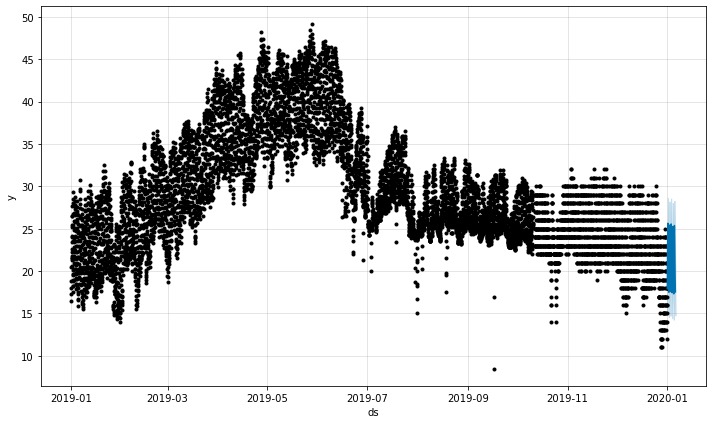

In [26]:
#Plotting the past trend and forecast for the upcoming days.

fig1 = m_temp_2020.plot(forecast_temp_2020)

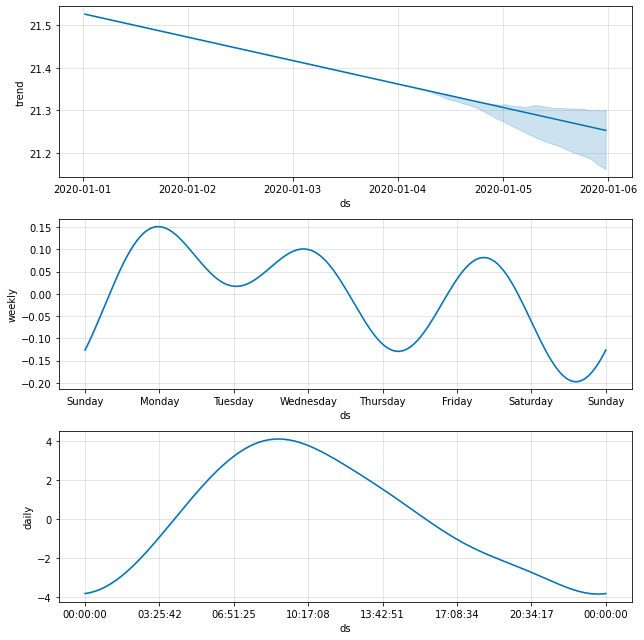

In [27]:
#Plotting the trend in the form of date, day and time.

fig2 = m_temp_2020.plot_components(forecast_temp_2020)

Data Pre-Processing to obtain prediction for humidity values.

In [28]:
Humidity = ['HUM']

In [29]:
Hum_Sensor = df[df['sensor'].isin(Humidity)]
Hum_Sensor = Hum_Sensor.drop(['sensor'],axis=1)
Hum_Sensor

,value,datetime
1,44.0,2019-01-01 00:00:00+00:00
4,43.0,2019-01-01 01:00:00+00:00
7,42.0,2019-01-01 02:00:00+00:00
10,42.0,2019-01-01 03:00:00+00:00
13,37.0,2019-01-01 04:00:00+00:00
...,...,...
26197,49.0,2019-12-31 19:30:00+00:00
26200,49.0,2019-12-31 20:30:00+00:00
26203,48.0,2019-12-31 21:30:00+00:00
26206,47.0,2019-12-31 22:30:00+00:00


In [30]:
X_Hum = Hum_Sensor['value']
X_Hum_Time = Hum_Sensor['datetime']

In [31]:
X_Hum = pd.concat([X_Hum_Time,X_Hum],axis=1,ignore_index=True)
X_Hum

,0,1
1,2019-01-01 00:00:00+00:00,44.0
4,2019-01-01 01:00:00+00:00,43.0
7,2019-01-01 02:00:00+00:00,42.0
10,2019-01-01 03:00:00+00:00,42.0
13,2019-01-01 04:00:00+00:00,37.0
...,...,...
26197,2019-12-31 19:30:00+00:00,49.0
26200,2019-12-31 20:30:00+00:00,49.0
26203,2019-12-31 21:30:00+00:00,48.0
26206,2019-12-31 22:30:00+00:00,47.0


In [32]:
X_Hum['ds'] = X_Hum[0]
X_Hum['y'] = X_Hum[1]
X_Hum

,0,1,ds,y
1,2019-01-01 00:00:00+00:00,44.0,2019-01-01 00:00:00+00:00,44.0
4,2019-01-01 01:00:00+00:00,43.0,2019-01-01 01:00:00+00:00,43.0
7,2019-01-01 02:00:00+00:00,42.0,2019-01-01 02:00:00+00:00,42.0
10,2019-01-01 03:00:00+00:00,42.0,2019-01-01 03:00:00+00:00,42.0
13,2019-01-01 04:00:00+00:00,37.0,2019-01-01 04:00:00+00:00,37.0
...,...,...,...,...
26197,2019-12-31 19:30:00+00:00,49.0,2019-12-31 19:30:00+00:00,49.0
26200,2019-12-31 20:30:00+00:00,49.0,2019-12-31 20:30:00+00:00,49.0
26203,2019-12-31 21:30:00+00:00,48.0,2019-12-31 21:30:00+00:00,48.0
26206,2019-12-31 22:30:00+00:00,47.0,2019-12-31 22:30:00+00:00,47.0


In [33]:
X_Hum = X_Hum.drop([0],axis=1)
X_Hum

,1,ds,y
1,44.0,2019-01-01 00:00:00+00:00,44.0
4,43.0,2019-01-01 01:00:00+00:00,43.0
7,42.0,2019-01-01 02:00:00+00:00,42.0
10,42.0,2019-01-01 03:00:00+00:00,42.0
13,37.0,2019-01-01 04:00:00+00:00,37.0
...,...,...,...
26197,49.0,2019-12-31 19:30:00+00:00,49.0
26200,49.0,2019-12-31 20:30:00+00:00,49.0
26203,48.0,2019-12-31 21:30:00+00:00,48.0
26206,47.0,2019-12-31 22:30:00+00:00,47.0


In [34]:
X_Hum = X_Hum.drop([1],axis=1)
X_Hum

,ds,y
1,2019-01-01 00:00:00+00:00,44.0
4,2019-01-01 01:00:00+00:00,43.0
7,2019-01-01 02:00:00+00:00,42.0
10,2019-01-01 03:00:00+00:00,42.0
13,2019-01-01 04:00:00+00:00,37.0
...,...,...
26197,2019-12-31 19:30:00+00:00,49.0
26200,2019-12-31 20:30:00+00:00,49.0
26203,2019-12-31 21:30:00+00:00,48.0
26206,2019-12-31 22:30:00+00:00,47.0


In [35]:
X_Hum['ds'] = X_Hum['ds'].astype(str).str[:-6]
X_Hum

,ds,y
1,2019-01-01 00:00:00,44.0
4,2019-01-01 01:00:00,43.0
7,2019-01-01 02:00:00,42.0
10,2019-01-01 03:00:00,42.0
13,2019-01-01 04:00:00,37.0
...,...,...
26197,2019-12-31 19:30:00,49.0
26200,2019-12-31 20:30:00,49.0
26203,2019-12-31 21:30:00,48.0
26206,2019-12-31 22:30:00,47.0


In [36]:
Hum_train = X_Hum[(X_Hum['ds']>='2019-01-01') & (X_Hum['ds']<='2019-12-26')]
Hum_test = X_Hum[(X_Hum['ds']>'2019-12-26')]

Model creation for humidity prediction.

In [37]:
m_Hum = fbprophet.Prophet()

In [38]:
m_Hum.fit(Hum_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [39]:
forecast_Hum = m_Hum.predict(Hum_test)
forecast_Hum[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2019-12-26 00:30:00,50.578592,37.423636,62.492991
1,2019-12-26 01:30:00,49.013983,36.989442,60.250680
2,2019-12-26 02:30:00,46.571817,34.611412,57.729645
3,2019-12-26 03:30:00,43.528510,31.347274,56.016314
4,2019-12-26 04:30:00,40.185778,28.820272,51.939513
...,...,...,...,...
139,2019-12-31 19:30:00,42.271627,29.264983,55.037811
140,2019-12-31 20:30:00,43.663425,31.676179,55.615796
141,2019-12-31 21:30:00,45.025949,32.600590,57.908700
142,2019-12-31 22:30:00,46.121155,33.725973,57.579890


In [40]:
# Mean Squared Error (MSE)
MSE = mean_squared_error(forecast_Hum['yhat'], Hum_test['y'])
print('Mean Squared Error (MSE): ' + str(np.round(MSE, 2)))

# Root Mean Squarred Error (RMSE) 
RMSE = np.sqrt(MSE)
print('Root Mean Squared Error (RMSE): ' + str(np.round(RMSE, 2)))

# Mean Absolute Error (MAE)
MAE = mean_absolute_error(forecast_Hum['yhat'], Hum_test['y'])
print('Mean Absolute Error (MAE): ' + str(np.round(MAE, 2)) + ' %')

Mean Squared Error (MSE): 286.17
Root Mean Squared Error (RMSE): 16.92
Mean Absolute Error (MAE): 11.59 %


In [41]:
m_hum_2020 = fbprophet.Prophet()

In [42]:
m_hum_2020.fit(X_Hum)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [43]:
forecast_Hum_2020 = m_hum_2020.make_future_dataframe(periods = 24*5, freq="H", include_history = False)
forecast_Hum_2020

,ds
0,2020-01-01 00:30:00
1,2020-01-01 01:30:00
2,2020-01-01 02:30:00
3,2020-01-01 03:30:00
4,2020-01-01 04:30:00
...,...
115,2020-01-05 19:30:00
116,2020-01-05 20:30:00
117,2020-01-05 21:30:00
118,2020-01-05 22:30:00


In [44]:
future_forecast_Hum_2020 = m_hum_2020.predict(forecast_Hum_2020)
future_forecast_Hum_2020[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-01 00:30:00,47.062898,34.389419,60.446418
1,2020-01-01 01:30:00,45.591105,33.931891,57.821351
2,2020-01-01 02:30:00,43.242798,30.397363,55.241824
3,2020-01-01 03:30:00,40.293427,27.517963,52.618587
4,2020-01-01 04:30:00,37.048765,23.161554,49.869711
...,...,...,...,...
115,2020-01-05 19:30:00,41.404712,28.936666,52.746677
116,2020-01-05 20:30:00,42.708271,30.310165,55.135135
117,2020-01-05 21:30:00,43.987969,31.597546,56.386063
118,2020-01-05 22:30:00,45.018115,32.950197,57.032757


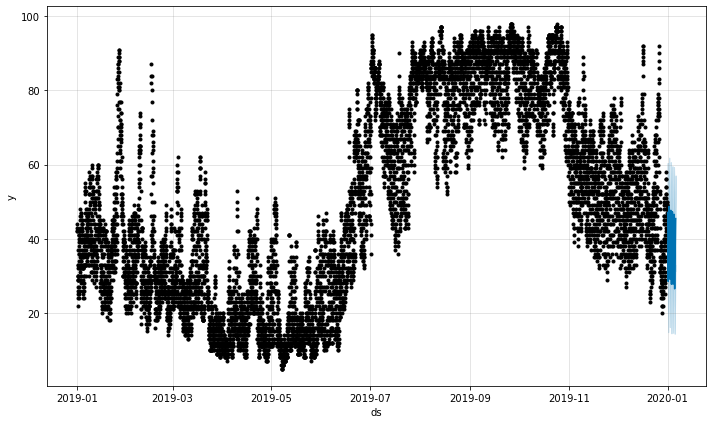

In [45]:
fig3 = m_hum_2020.plot(future_forecast_Hum_2020)

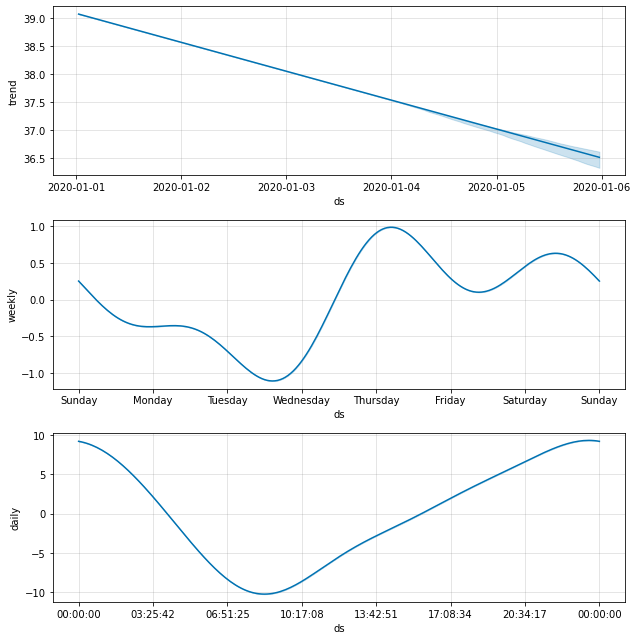

In [46]:
fig4 = m_hum_2020.plot_components(future_forecast_Hum_2020)

Data Pre-Processing for to obtain prediction for pressure values.

In [47]:
Pressure = ['PRES']

In [48]:
Pres_Sensor = df[df['sensor'].isin(Pressure)]
Pres_Sensor = Pres_Sensor.drop(['sensor'],axis=1)
Pres_Sensor

,value,datetime
2,1020.0,2019-01-01 00:00:00+00:00
5,1021.0,2019-01-01 01:00:00+00:00
8,1021.0,2019-01-01 02:00:00+00:00
11,1022.0,2019-01-01 03:00:00+00:00
14,1021.0,2019-01-01 04:00:00+00:00
...,...,...
26198,1016.0,2019-12-31 19:30:00+00:00
26201,1016.0,2019-12-31 20:30:00+00:00
26204,1016.0,2019-12-31 21:30:00+00:00
26207,1016.0,2019-12-31 22:30:00+00:00


In [49]:
X_Pres = Pres_Sensor['value']
X_Pres_Time = Pres_Sensor['datetime']

In [50]:
X_Pres = pd.concat([X_Pres_Time,X_Pres],axis=1,ignore_index=True)
X_Pres

,0,1
2,2019-01-01 00:00:00+00:00,1020.0
5,2019-01-01 01:00:00+00:00,1021.0
8,2019-01-01 02:00:00+00:00,1021.0
11,2019-01-01 03:00:00+00:00,1022.0
14,2019-01-01 04:00:00+00:00,1021.0
...,...,...
26198,2019-12-31 19:30:00+00:00,1016.0
26201,2019-12-31 20:30:00+00:00,1016.0
26204,2019-12-31 21:30:00+00:00,1016.0
26207,2019-12-31 22:30:00+00:00,1016.0


In [51]:
X_Pres['ds'] = X_Pres[0]
X_Pres['y'] = X_Pres[1]
X_Pres

,0,1,ds,y
2,2019-01-01 00:00:00+00:00,1020.0,2019-01-01 00:00:00+00:00,1020.0
5,2019-01-01 01:00:00+00:00,1021.0,2019-01-01 01:00:00+00:00,1021.0
8,2019-01-01 02:00:00+00:00,1021.0,2019-01-01 02:00:00+00:00,1021.0
11,2019-01-01 03:00:00+00:00,1022.0,2019-01-01 03:00:00+00:00,1022.0
14,2019-01-01 04:00:00+00:00,1021.0,2019-01-01 04:00:00+00:00,1021.0
...,...,...,...,...
26198,2019-12-31 19:30:00+00:00,1016.0,2019-12-31 19:30:00+00:00,1016.0
26201,2019-12-31 20:30:00+00:00,1016.0,2019-12-31 20:30:00+00:00,1016.0
26204,2019-12-31 21:30:00+00:00,1016.0,2019-12-31 21:30:00+00:00,1016.0
26207,2019-12-31 22:30:00+00:00,1016.0,2019-12-31 22:30:00+00:00,1016.0


In [52]:
X_Pres = X_Pres.drop([0],axis=1)
X_Pres

,1,ds,y
2,1020.0,2019-01-01 00:00:00+00:00,1020.0
5,1021.0,2019-01-01 01:00:00+00:00,1021.0
8,1021.0,2019-01-01 02:00:00+00:00,1021.0
11,1022.0,2019-01-01 03:00:00+00:00,1022.0
14,1021.0,2019-01-01 04:00:00+00:00,1021.0
...,...,...,...
26198,1016.0,2019-12-31 19:30:00+00:00,1016.0
26201,1016.0,2019-12-31 20:30:00+00:00,1016.0
26204,1016.0,2019-12-31 21:30:00+00:00,1016.0
26207,1016.0,2019-12-31 22:30:00+00:00,1016.0


In [53]:
X_Pres = X_Pres.drop([1],axis=1)
X_Pres

,ds,y
2,2019-01-01 00:00:00+00:00,1020.0
5,2019-01-01 01:00:00+00:00,1021.0
8,2019-01-01 02:00:00+00:00,1021.0
11,2019-01-01 03:00:00+00:00,1022.0
14,2019-01-01 04:00:00+00:00,1021.0
...,...,...
26198,2019-12-31 19:30:00+00:00,1016.0
26201,2019-12-31 20:30:00+00:00,1016.0
26204,2019-12-31 21:30:00+00:00,1016.0
26207,2019-12-31 22:30:00+00:00,1016.0


In [54]:
X_Pres['ds'] = X_Pres['ds'].astype(str).str[:-6]
X_Pres

,ds,y
2,2019-01-01 00:00:00,1020.0
5,2019-01-01 01:00:00,1021.0
8,2019-01-01 02:00:00,1021.0
11,2019-01-01 03:00:00,1022.0
14,2019-01-01 04:00:00,1021.0
...,...,...
26198,2019-12-31 19:30:00,1016.0
26201,2019-12-31 20:30:00,1016.0
26204,2019-12-31 21:30:00,1016.0
26207,2019-12-31 22:30:00,1016.0


In [55]:
Pres_train = X_Pres[(X_Pres['ds']>='2019-01-01') & (X_Pres['ds']<='2019-12-26')]
Pres_test = X_Pres[(X_Pres['ds']>'2019-12-26')]

Model creation for humidity prediction.

In [56]:
m_pres = fbprophet.Prophet()

In [57]:
m_pres.fit(Pres_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [58]:
future_forecast_pres_2020 = m_pres.make_future_dataframe(periods=5*24, freq='H', include_history=False)
future_forecast_pres_2020

,ds
0,2019-12-26 00:30:00
1,2019-12-26 01:30:00
2,2019-12-26 02:30:00
3,2019-12-26 03:30:00
4,2019-12-26 04:30:00
...,...
115,2019-12-30 19:30:00
116,2019-12-30 20:30:00
117,2019-12-30 21:30:00
118,2019-12-30 22:30:00


In [59]:
future_forecast_pres = m_pres.predict(Pres_test)
future_forecast_pres

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-12-26 00:30:00,1015.834456,1014.382596,1018.576896,1015.834456,1015.834456,0.686277,0.686277,0.686277,0.702185,0.702185,0.702185,-0.015908,-0.015908,-0.015908,0.0,0.0,0.0,1016.520733
1,2019-12-26 01:30:00,1015.837098,1014.999584,1019.385259,1015.837098,1015.837098,1.354624,1.354624,1.354624,1.365919,1.365919,1.365919,-0.011295,-0.011295,-0.011295,0.0,0.0,0.0,1017.191722
2,2019-12-26 02:30:00,1015.839740,1015.630682,1019.803942,1015.839740,1015.839740,1.887394,1.887394,1.887394,1.893998,1.893998,1.893998,-0.006604,-0.006604,-0.006604,0.0,0.0,0.0,1017.727134
3,2019-12-26 03:30:00,1015.842382,1015.702284,1020.125068,1015.842382,1015.842382,2.101995,2.101995,2.101995,2.103850,2.103850,2.103850,-0.001855,-0.001855,-0.001855,0.0,0.0,0.0,1017.944377
4,2019-12-26 04:30:00,1015.845024,1015.541137,1019.877507,1015.845024,1015.845024,1.921355,1.921355,1.921355,1.918428,1.918428,1.918428,0.002927,0.002927,0.002927,0.0,0.0,0.0,1017.766380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2019-12-31 19:30:00,1016.201715,1013.680576,1018.455659,1015.775067,1016.734659,-0.114803,-0.114803,-0.114803,0.017927,0.017927,0.017927,-0.132730,-0.132730,-0.132730,0.0,0.0,0.0,1016.086911
140,2019-12-31 20:30:00,1016.204357,1013.433693,1018.142731,1015.773202,1016.744869,-0.326154,-0.326154,-0.326154,-0.198038,-0.198038,-0.198038,-0.128115,-0.128115,-0.128115,0.0,0.0,0.0,1015.878203
141,2019-12-31 21:30:00,1016.206999,1013.627962,1018.186875,1015.741741,1016.753076,-0.439022,-0.439022,-0.439022,-0.315528,-0.315528,-0.315528,-0.123493,-0.123493,-0.123493,0.0,0.0,0.0,1015.767977
142,2019-12-31 22:30:00,1016.209641,1013.419498,1018.305385,1015.703931,1016.761283,-0.350884,-0.350884,-0.350884,-0.231989,-0.231989,-0.231989,-0.118895,-0.118895,-0.118895,0.0,0.0,0.0,1015.858757


In [60]:
future_forecast_pres[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2019-12-26 00:30:00,1016.520733,1014.382596,1018.576896
1,2019-12-26 01:30:00,1017.191722,1014.999584,1019.385259
2,2019-12-26 02:30:00,1017.727134,1015.630682,1019.803942
3,2019-12-26 03:30:00,1017.944377,1015.702284,1020.125068
4,2019-12-26 04:30:00,1017.766380,1015.541137,1019.877507
...,...,...,...,...
139,2019-12-31 19:30:00,1016.086911,1013.680576,1018.455659
140,2019-12-31 20:30:00,1015.878203,1013.433693,1018.142731
141,2019-12-31 21:30:00,1015.767977,1013.627962,1018.186875
142,2019-12-31 22:30:00,1015.858757,1013.419498,1018.305385


In [61]:
# Mean Squared Error (MSE)
MSE = mean_squared_error(future_forecast_pres['yhat'], Pres_test['y'])
print('Mean Squared Error (MSE): ' + str(np.round(MSE, 2)))

# Root Mean Squarred Error (RMSE) 
RMSE = np.sqrt(MSE)
print('Root Mean Squared Error (RMSE): ' + str(np.round(RMSE, 2)))

# Mean Absolute Error (MAE)
MAE = mean_absolute_error(future_forecast_pres['yhat'], Pres_test['y'])
print('Mean Absolute Error (MAE): ' + str(np.round(MAE, 2)) + ' %')

Mean Squared Error (MSE): 1.55
Root Mean Squared Error (RMSE): 1.25
Mean Absolute Error (MAE): 0.92 %


In [62]:
m_pres_2020 = fbprophet.Prophet()

In [63]:
m_pres_2020.fit(X_Pres)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [64]:
future_forecast_pres_2020 = m_pres_2020.make_future_dataframe(periods=5*24, freq='H', include_history=False)
future_forecast_pres_2020

,ds
0,2020-01-01 00:30:00
1,2020-01-01 01:30:00
2,2020-01-01 02:30:00
3,2020-01-01 03:30:00
4,2020-01-01 04:30:00
...,...
115,2020-01-05 19:30:00
116,2020-01-05 20:30:00
117,2020-01-05 21:30:00
118,2020-01-05 22:30:00


In [65]:
forecast_pres_2020 = m_pres_2020.predict(future_forecast_temp_2020)
forecast_pres_2020[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-01 00:30:00,1016.596337,1014.424768,1018.684252
1,2020-01-01 01:30:00,1017.264946,1015.177091,1019.335655
2,2020-01-01 02:30:00,1017.798454,1015.527461,1020.013150
3,2020-01-01 03:30:00,1018.013823,1016.057732,1020.271145
4,2020-01-01 04:30:00,1017.832775,1015.660302,1020.067758
...,...,...,...,...
115,2020-01-05 19:30:00,1016.580906,1014.259579,1019.014908
116,2020-01-05 20:30:00,1016.357973,1013.946991,1018.693566
117,2020-01-05 21:30:00,1016.232943,1013.830467,1018.567764
118,2020-01-05 22:30:00,1016.306859,1013.732344,1018.702609


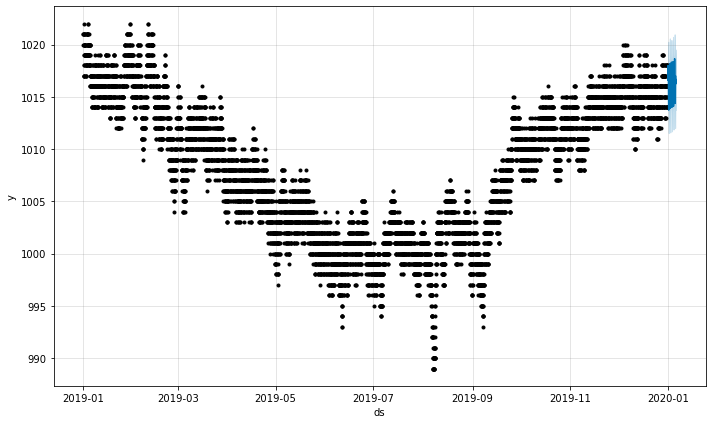

In [66]:
fig5 = m_pres_2020.plot(forecast_pres_2020)

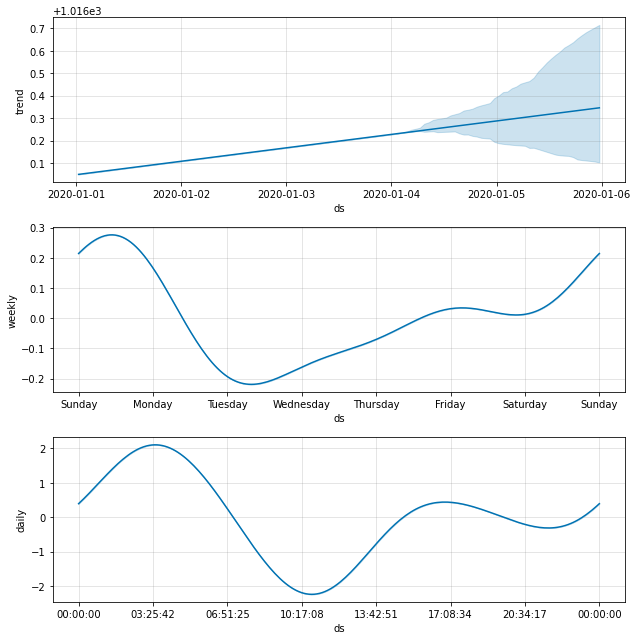

In [67]:
fig6 = m_pres_2020.plot_components(forecast_pres_2020)